In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Q9: Load the Google Playstore dataset and examine its dimensions.
playstore_data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print("Dimensions of the dataset:", playstore_data.shape)  # This will give you the number of rows and columns

Dimensions of the dataset: (10841, 13)


In [36]:
playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [63]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [64]:
playstore_data.describe()

,Rating,Installs
count,9367.000000,10841.000000
mean,4.193338,106.548012
std,0.537431,72.851130
min,1.000000,0.000000
25%,4.000000,100.000000
50%,4.300000,100.000000
75%,4.500000,100.000000
max,19.000000,500.000000


In [67]:
playstore_data.fillna

<bound method DataFrame.fillna of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [42]:
#find 'free' in 'Installs' and replace it with 0

playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: x.replace('Free', '0'))


In [68]:
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')
median_installs= playstore_data['Installs'].median()
playstore_data['Installs'] = playstore_data['Installs'].fillna(median_installs)
playstore_data['Installs']=playstore_data['Installs'].astype('int')


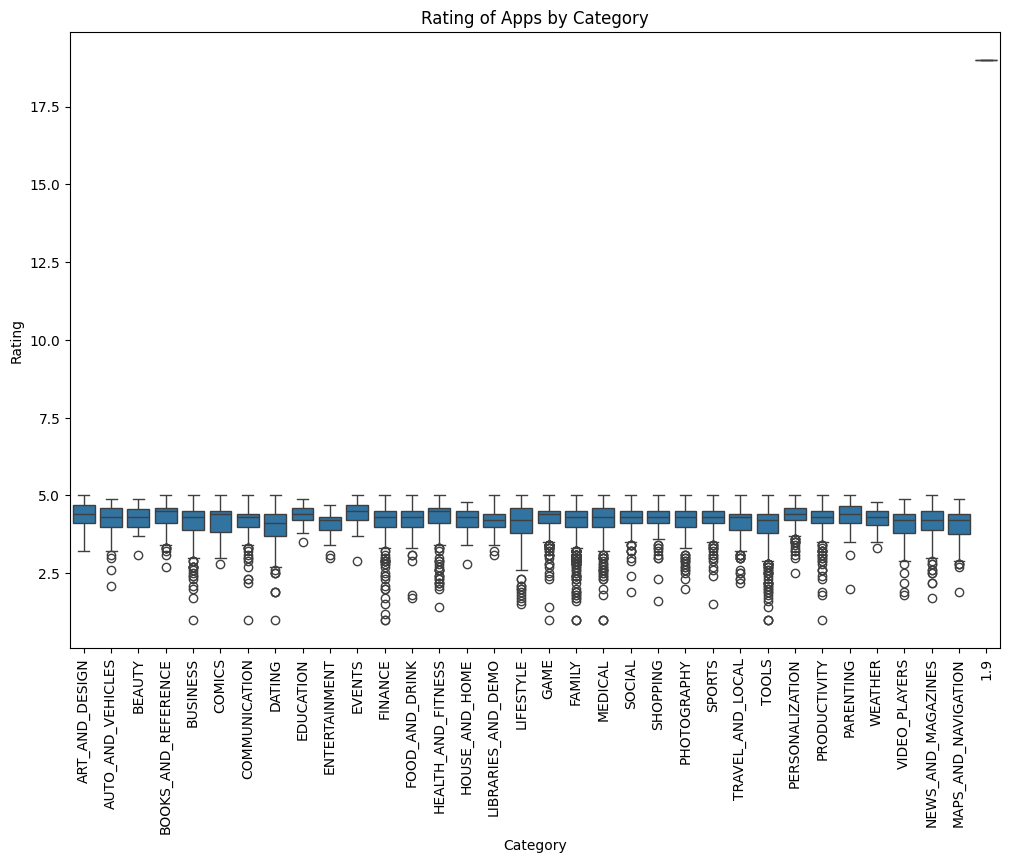

In [2]:
# Q10: Rating of apps by category
plt.figure(figsize=(12, 8))
sns.boxplot(data=playstore_data, x='Category', y='Rating')
plt.title('Rating of Apps by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [69]:
# Q11: Missing values in the dataset
missing_values = playstore_data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


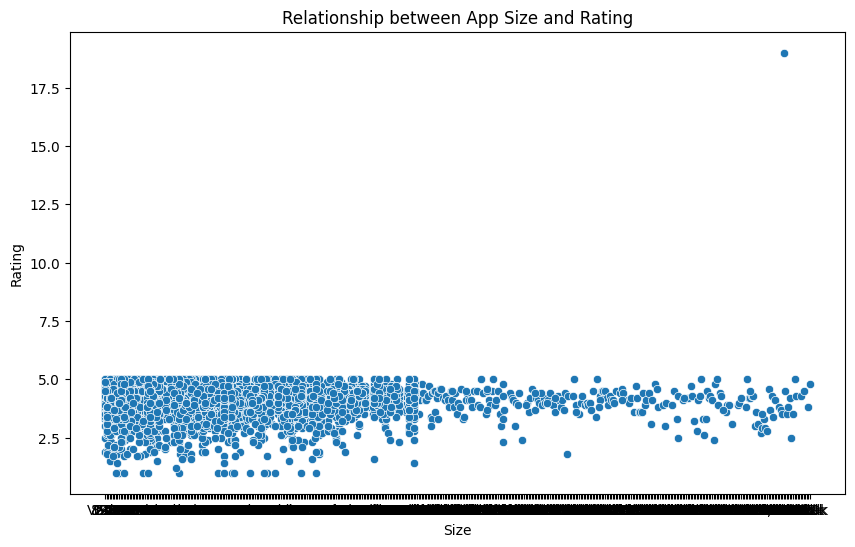

In [8]:
# Q12: Relationship between app size and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=playstore_data, x='Size', y='Rating')
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

In [ ]:
#Q13: Effect of app type on price
playstore_data['Price']=pd.to_numeric(playstore_data['Price'],errors='coerce')
average_price_by_type = playstore_data.groupby('Type')['Price'].mean()
plt.figure(figsize=(8, 6))
average_price_by_type.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [57]:
# Q14: Top 10 most popular apps
top_10_apps = playstore_data.sort_values(by='Installs',ascending=False).head(10)

print("Top 10 most popular apps:")
print(top_10_apps)


Top 10 most popular apps:
                                                App         Category  Rating  \
5116                                    AG EMS Tour           FAMILY     NaN   
10097                EY EMEIA Diversity & Inclusion         BUSINESS     NaN   
5819                                      AX Selfie        LIFESTYLE     4.6   
7250                                       iOBD2-CF            TOOLS     3.4   
4482   P XPERIA Theme™ | PURPLE - Design For SONY 🎨  PERSONALIZATION     NaN   
10066                   GO Contacts EX Black & Grey  PERSONALIZATION     3.7   
684                           Teenage Chat & Dating           DATING     3.4   
4488                        pretty Easy privacy p≡p    COMMUNICATION     3.7   
5796                     Tips Microsoft Dynamics Ax     PRODUCTIVITY     NaN   
10079                                    EY eMentor           FAMILY     NaN   

      Reviews  Size  Installs  Type Price Content Rating           Genres  \
5116        3   

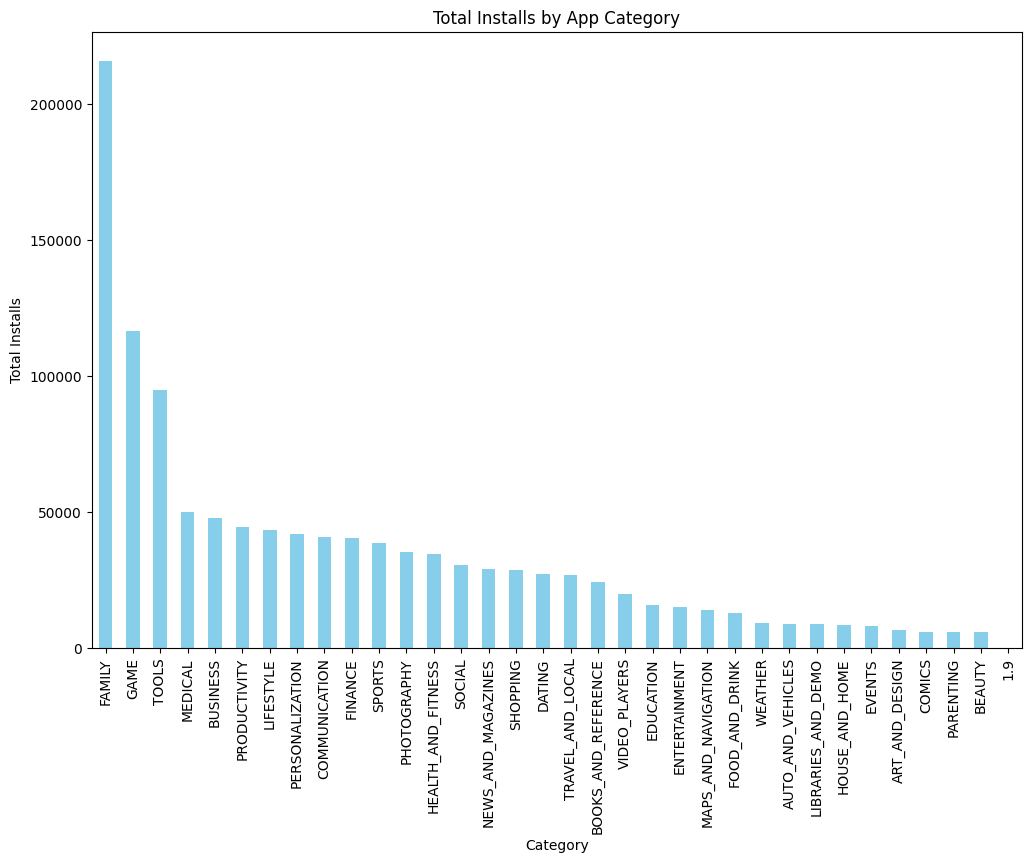

In [58]:
# Q15: Identifying most popular app categories
# Approach: Analyze the 'Category' feature and calculate the total installs for each category.
# Present findings using a bar chart.
popular_categories = playstore_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
popular_categories.plot(kind='bar', color='skyblue')
plt.title('Total Installs by App Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

<BarContainer object of 10 artists>

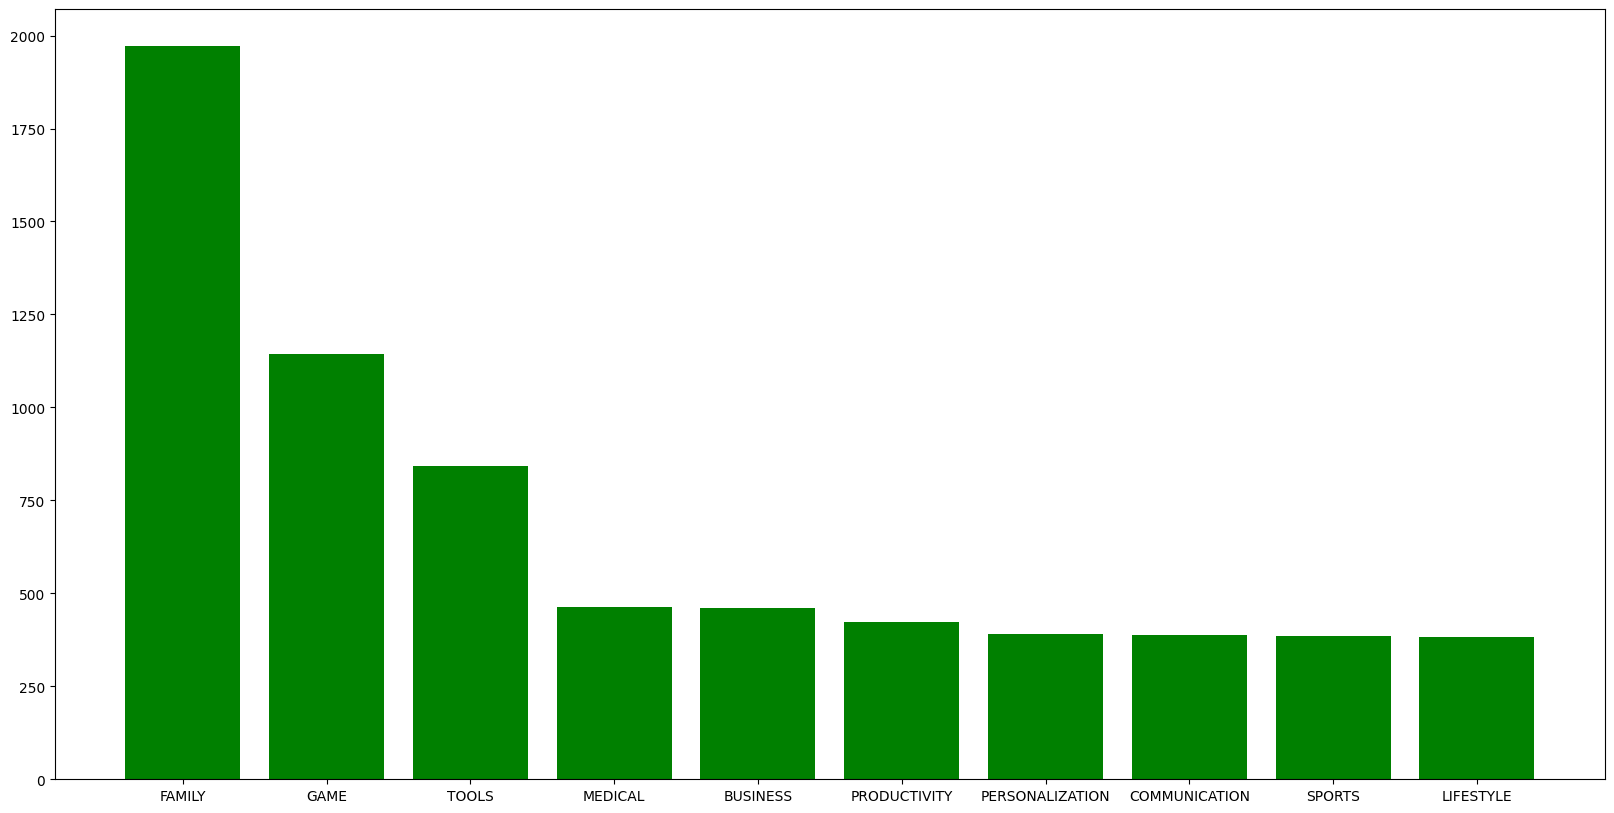

In [59]:
#top 10 categories having high number of apps
counts=playstore_data['Category'].value_counts()
counts.groupby(playstore_data['App'])
df_top_categories=counts.head(10)
df_top_categories
plt.figure(figsize=(20,10))
plt.bar(df_top_categories.index,df_top_categories,color='green')

# Q16: Identifying most successful app developers
# Features to analyze: 'App', 'Category', 'Installs', 'Rating', 'Reviews'
# Use data visualization techniques such as scatter plots and bar charts to present findings.
# Group data by 'App' or 'Category' and aggregate metrics like 'Installs' and 'Reviews' to identify successful developers.



In [62]:
#Apps with the highest ratings
top_5_apps=playstore_data.sort_values(by='Rating',ascending=False).head(5)
top_5_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,100,Free,10000,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100,Free,100,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,100,Free,1000,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100,Free,100,Teen,Social,"May 19, 2018",1.04,4.0.3 and up


In [60]:
# Q17: Identifying the best time to launch a new app
# Features to analyze: 'Last Updated', 'Installs', 'Category', 'Rating'
# we can analyze trends over time using line plots or histograms to identify periods of high app installations or user engagement.


In [ ]:
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

monthly_app_releases = playstore_data.groupby(playstore_data['Last Updated'].dt.month)['App'].count()

monthly_app_releases.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of App Releases')
plt.title('Best Time to Launch a New App')
plt.xticks(rotation=0)
plt.show()